# Final Project: Preliminary Draft
## Delaney Curran
### 12/07/2022

The purpose of this project is to look at NBA data To determine what impact playing at home versus away has on a game. For this project I will be using the NBA API to gather my data.There are so many factors and variables that go into a NBA game I want to see what is actually important and what drives a team to win.

In [42]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from scipy import stats
import json
import seaborn as sns

In [43]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:30]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [44]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

cavs = [team for team in nba_teams if team['abbreviation'] == 'CLE'][0]
cavs_id = cavs['id']

In [45]:
cavs

{'id': 1610612739,
 'full_name': 'Cleveland Cavaliers',
 'abbreviation': 'CLE',
 'nickname': 'Cavaliers',
 'city': 'Cleveland',
 'state': 'Ohio',
 'year_founded': 1970}

In [46]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import SeasonAll

cavs_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=cavs_id).get_data_frames()[0]

In [47]:
cavs_games.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0     22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
1     22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
2     22022  1610612739               CLE  Cleveland Cavaliers  0022200360   
3     22022  1610612739               CLE  Cleveland Cavaliers  0022200348   
4     22022  1610612739               CLE  Cleveland Cavaliers  0022200330   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2022-12-10  CLE vs. OKC  W  241  110  ...   0.692    12    36   48   25   
1  2022-12-09  CLE vs. SAC  L  241   95  ...   0.773     8    28   36   20   
2  2022-12-06  CLE vs. LAL  W  241  116  ...   0.765     9    35   44   25   
3  2022-12-04    CLE @ NYK  L  240   81  ...   0.750     8    31   39   17   
4  2022-12-02  CLE vs. ORL  W  240  107  ...   1.000     5    28   33   22   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    6    4   11  14         8.0  
1    7    4   19  23       -11.0  
2   11    3    7  20        14.0  
3    7    6   17  15       -11.0  
4    7    5   12  14        11.0  

[5 rows x 28 columns]

In [48]:
minuts = stats.describe(cavs_games['MIN'])
minuts

DescribeResult(nobs=3554, minmax=(46, 315), mean=240.54755205402364, variance=135.27848682884044, skewness=-5.300583860384139, kurtosis=92.35243192538805)

In [49]:
ast = stats.describe(cavs_games['AST'])
ast

DescribeResult(nobs=3554, minmax=(3, 45), mean=22.55149127743388, variance=33.46498088832806, skewness=0.32459559810481436, kurtosis=0.3579199944280802)

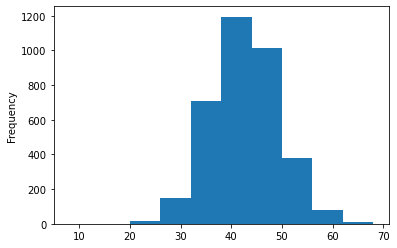

In [50]:
FT_PCT = cavs_games['REB'].plot.hist()
plt.show()

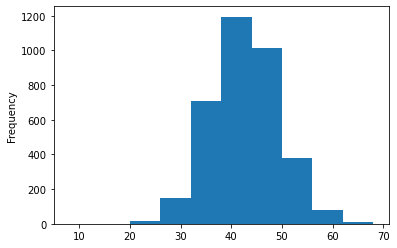

In [51]:
Reb = cavs_games['REB'].plot.hist()
plt.show()

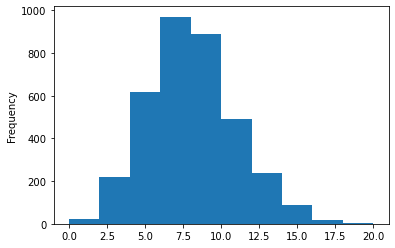

In [52]:
STL = cavs_games['STL'].plot.hist()
plt.show()

This is the data set that I will be working with for the final project. I am looking at Cleveland cavalier games from all seasons. I did some simple summaries so I can get the gist of the data set. One thing that I need to figure out is how to look at wins and losses because they are categorized as "W" and "L". I think that this data set is a good start for this project. I also used the help of https://github.com/swar/nba_api to understand how the NBA API works.

In [103]:
cavs_games1 = cavs_games.replace(to_replace = ["W", "L"], value = [0, 1])
cavs_games1

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0        22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
1        22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
2        22022  1610612739               CLE  Cleveland Cavaliers  0022200360   
3        22022  1610612739               CLE  Cleveland Cavaliers  0022200348   
4        22022  1610612739               CLE  Cleveland Cavaliers  0022200330   
...        ...         ...               ...                  ...         ...   
3549     21983  1610612739               CLE  Cleveland Cavaliers  0028300047   
3550     21983  1610612739               CLE  Cleveland Cavaliers  0028300031   
3551     21983  1610612739               CLE  Cleveland Cavaliers  0028300030   
3552     21983  1610612739               CLE  Cleveland Cavaliers  0028300019   
3553     21983  1610612739               CLE  Cleveland Cavaliers  0028300008   

       GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0     2022-12-10  CLE vs. OKC  0  241  110  ...   0.692    12    36   48   25   
1     2022-12-09  CLE vs. SAC  1  241   95  ...   0.773     8    28   36   20   
2     2022-12-06  CLE vs. LAL  0  241  116  ...   0.765     9    35   44   25   
3     2022-12-04    CLE @ NYK  1  240   81  ...   0.750     8    31   39   17   
4     2022-12-02  CLE vs. ORL  0  240  107  ...   1.000     5    28   33   22   
...          ...          ... ..  ...  ...  ...     ...   ...   ...  ...  ...   
3549  1983-11-04  CLE vs. DAL  0  240  105  ...   1.000    16    34   50   24   
3550  1983-11-02  CLE vs. HOU  0  240  103  ...   0.667    14    35   49   22   
3551  1983-11-01    CLE @ NJN  1  240  113  ...   0.647    11    20   31   24   
3552  1983-10-29  CLE vs. BOS  1  240   89  ...   0.810    16    28   44   16   
3553  1983-10-28  CLE vs. NYK  1  240  106  ...   0.650    18    17   35   22   

      STL  BLK  TOV  PF  PLUS_MINUS  
0       6    4   11  14         8.0  
1       7    4   19  23       -11.0  
2      11    3    7  20        14.0  
3       7    6   17  15       -11.0  
4       7    5   12  14        11.0  
...   ...  ...  ...  ..         ...  
3549    8    6   16  29         NaN  
3550    8    4   15  21         NaN  
3551    9    4   27  33         NaN  
3552    8    6   19  26         NaN  
3553    9    8   18  25         NaN  

[3554 rows x 28 columns]

Wins are coded as 0
Losses are coded as 1

In [104]:
if ('vs.' in cavs_games1['MATCHUP'][1]):
    print('0')
else:
    print('1')

    
test = [1 if ('vs.' in x) else 0 for x in cavs_games1['MATCHUP']]
test

0


[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


Here I am coding home and away games as zero and one so I am able to create graphs with them.

Home is coded as 1
Away is coded as 0

In [105]:
cavs_games1['HA'] = test
cavs_games1

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0        22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
1        22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
2        22022  1610612739               CLE  Cleveland Cavaliers  0022200360   
3        22022  1610612739               CLE  Cleveland Cavaliers  0022200348   
4        22022  1610612739               CLE  Cleveland Cavaliers  0022200330   
...        ...         ...               ...                  ...         ...   
3549     21983  1610612739               CLE  Cleveland Cavaliers  0028300047   
3550     21983  1610612739               CLE  Cleveland Cavaliers  0028300031   
3551     21983  1610612739               CLE  Cleveland Cavaliers  0028300030   
3552     21983  1610612739               CLE  Cleveland Cavaliers  0028300019   
3553     21983  1610612739               CLE  Cleveland Cavaliers  0028300008   

       GAME_DATE      MATCHUP WL  MIN  PTS  ...  OREB  DREB  REB  AST  STL  \
0     2022-12-10  CLE vs. OKC  0  241  110  ...    12    36   48   25    6   
1     2022-12-09  CLE vs. SAC  1  241   95  ...     8    28   36   20    7   
2     2022-12-06  CLE vs. LAL  0  241  116  ...     9    35   44   25   11   
3     2022-12-04    CLE @ NYK  1  240   81  ...     8    31   39   17    7   
4     2022-12-02  CLE vs. ORL  0  240  107  ...     5    28   33   22    7   
...          ...          ... ..  ...  ...  ...   ...   ...  ...  ...  ...   
3549  1983-11-04  CLE vs. DAL  0  240  105  ...    16    34   50   24    8   
3550  1983-11-02  CLE vs. HOU  0  240  103  ...    14    35   49   22    8   
3551  1983-11-01    CLE @ NJN  1  240  113  ...    11    20   31   24    9   
3552  1983-10-29  CLE vs. BOS  1  240   89  ...    16    28   44   16    8   
3553  1983-10-28  CLE vs. NYK  1  240  106  ...    18    17   35   22    9   

      BLK  TOV  PF  PLUS_MINUS  HA  
0       4   11  14         8.0   1  
1       4   19  23       -11.0   1  
2       3    7  20        14.0   1  
3       6   17  15       -11.0   0  
4       5   12  14        11.0   1  
...   ...  ...  ..         ...  ..  
3549    6   16  29         NaN   1  
3550    4   15  21         NaN   1  
3551    4   27  33         NaN   0  
3552    6   19  26         NaN   1  
3553    8   18  25         NaN   1  

[3554 rows x 29 columns]

The structure of this data shows Everything that the Cavs could do in a game during their entire team career. I have to manipulate the data a little bit to show wins and losses and home and away as numbers. Most of the columns are the count of that event occurring occurring during the game. For example BLK stands for block and the number represents the frequency it occurred during that given game. This is true for most of the columns.

In [106]:
cavs_games1.keys()

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HA'],
      dtype='object')

In [107]:
count_WL = cavs_games1.groupby('WL').count()['GAME_ID']
count_WL

WL
0    1747
1    1805
O       1
T       1
Name: GAME_ID, dtype: int64

We can see the total number of wins as 0 and the total number of losses as 1.

In [108]:
count_HA = cavs_games1.groupby('HA').count()['GAME_ID']
count_HA

HA
0    1761
1    1793
Name: GAME_ID, dtype: int64

We can see the total number of home games as 1 and the total number of ways games as 0.

In [109]:
WLHA = pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True)
WLHA

HA      0     1   All
WL                   
0     664  1083  1747
1    1097   708  1805
O       0     1     1
T       0     1     1
All  1761  1793  3554

Here I am creating a graph that is showing wins and losses at home and away games.

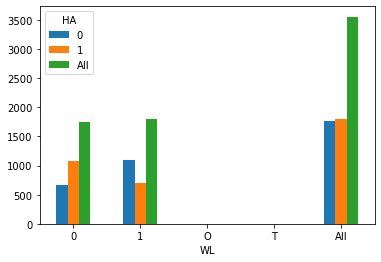

In [110]:
barplt_WL_HW = WLHA.plot.bar(rot=0)

As you can imagine the lowest category is wins away the next lowest category is losses at home. While away losses and home wins are fairly even.

I need to figure out how to illuminate O and T from the data

In [111]:
score = pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL])
score

HA   0     1         
WL   0  1  0  1  O  T
PTS                  
10   0  0  0  0  1  0
57   0  1  0  0  0  0
59   0  1  0  0  0  0
61   0  1  0  0  0  0
62   0  1  0  1  0  0
..  .. .. .. .. .. ..
141  0  0  1  0  0  0
142  0  0  1  0  0  0
144  0  0  1  0  0  0
147  0  0  1  0  0  0
148  0  1  1  0  0  0

[87 rows x 6 columns]

In this chart I am showing wins and losses at home and away based on point value.

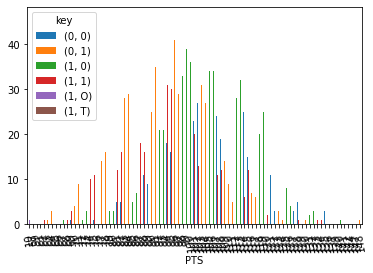

In [112]:
WL_HA_score = score.plot.bar(rot=100)
WL_HA_score.legend(title="key", loc= "upper left")

This is a graph that shows wins and losses at home and away games based on point value.

In [113]:
HA_score = pd.crosstab(cavs_games1.PTS,cavs_games1.HA)
HA_score

HA   0  1
PTS      
10   0  1
57   1  0
59   1  0
61   1  0
62   1  1
..  .. ..
141  0  1
142  0  1
144  0  1
147  0  1
148  1  1

[87 rows x 2 columns]

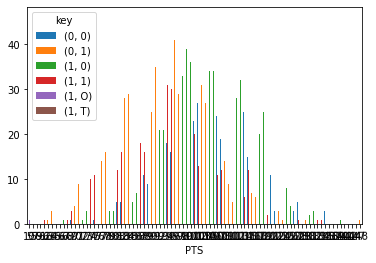

In [114]:
HA_score = score.plot.bar(rot=1)
HA_score.legend(title="key", loc= "upper left")

These graphs and chart show home and away games based on current value.

<AxesSubplot:xlabel='HA', ylabel='WL'>

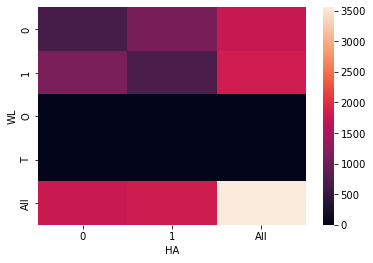

In [115]:
sns.heatmap(pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True ))

Does heat map shows home and away games that are wins and losses. We can see that the colors are fairly similar for home and away games.

<AxesSubplot:xlabel='HA-WL', ylabel='PTS'>

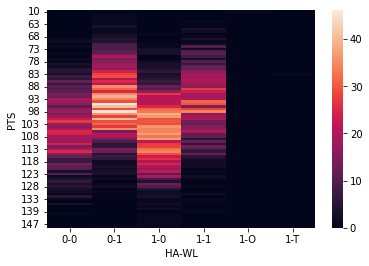

In [116]:
sns.heatmap(pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL]))

In [ ]:
Does heat map shows home and away games, wins and losses based on points scored in the games.

once again I need to get rid of the O and T because it is messing up the data. (Any suggestions would be helpful)

Next steps for this project car deciding which variables are important.  I also plan to cross tables and with the important variables. I will most likely add a regression. I still am deciding what is the best way to demonstrate the data that I have.

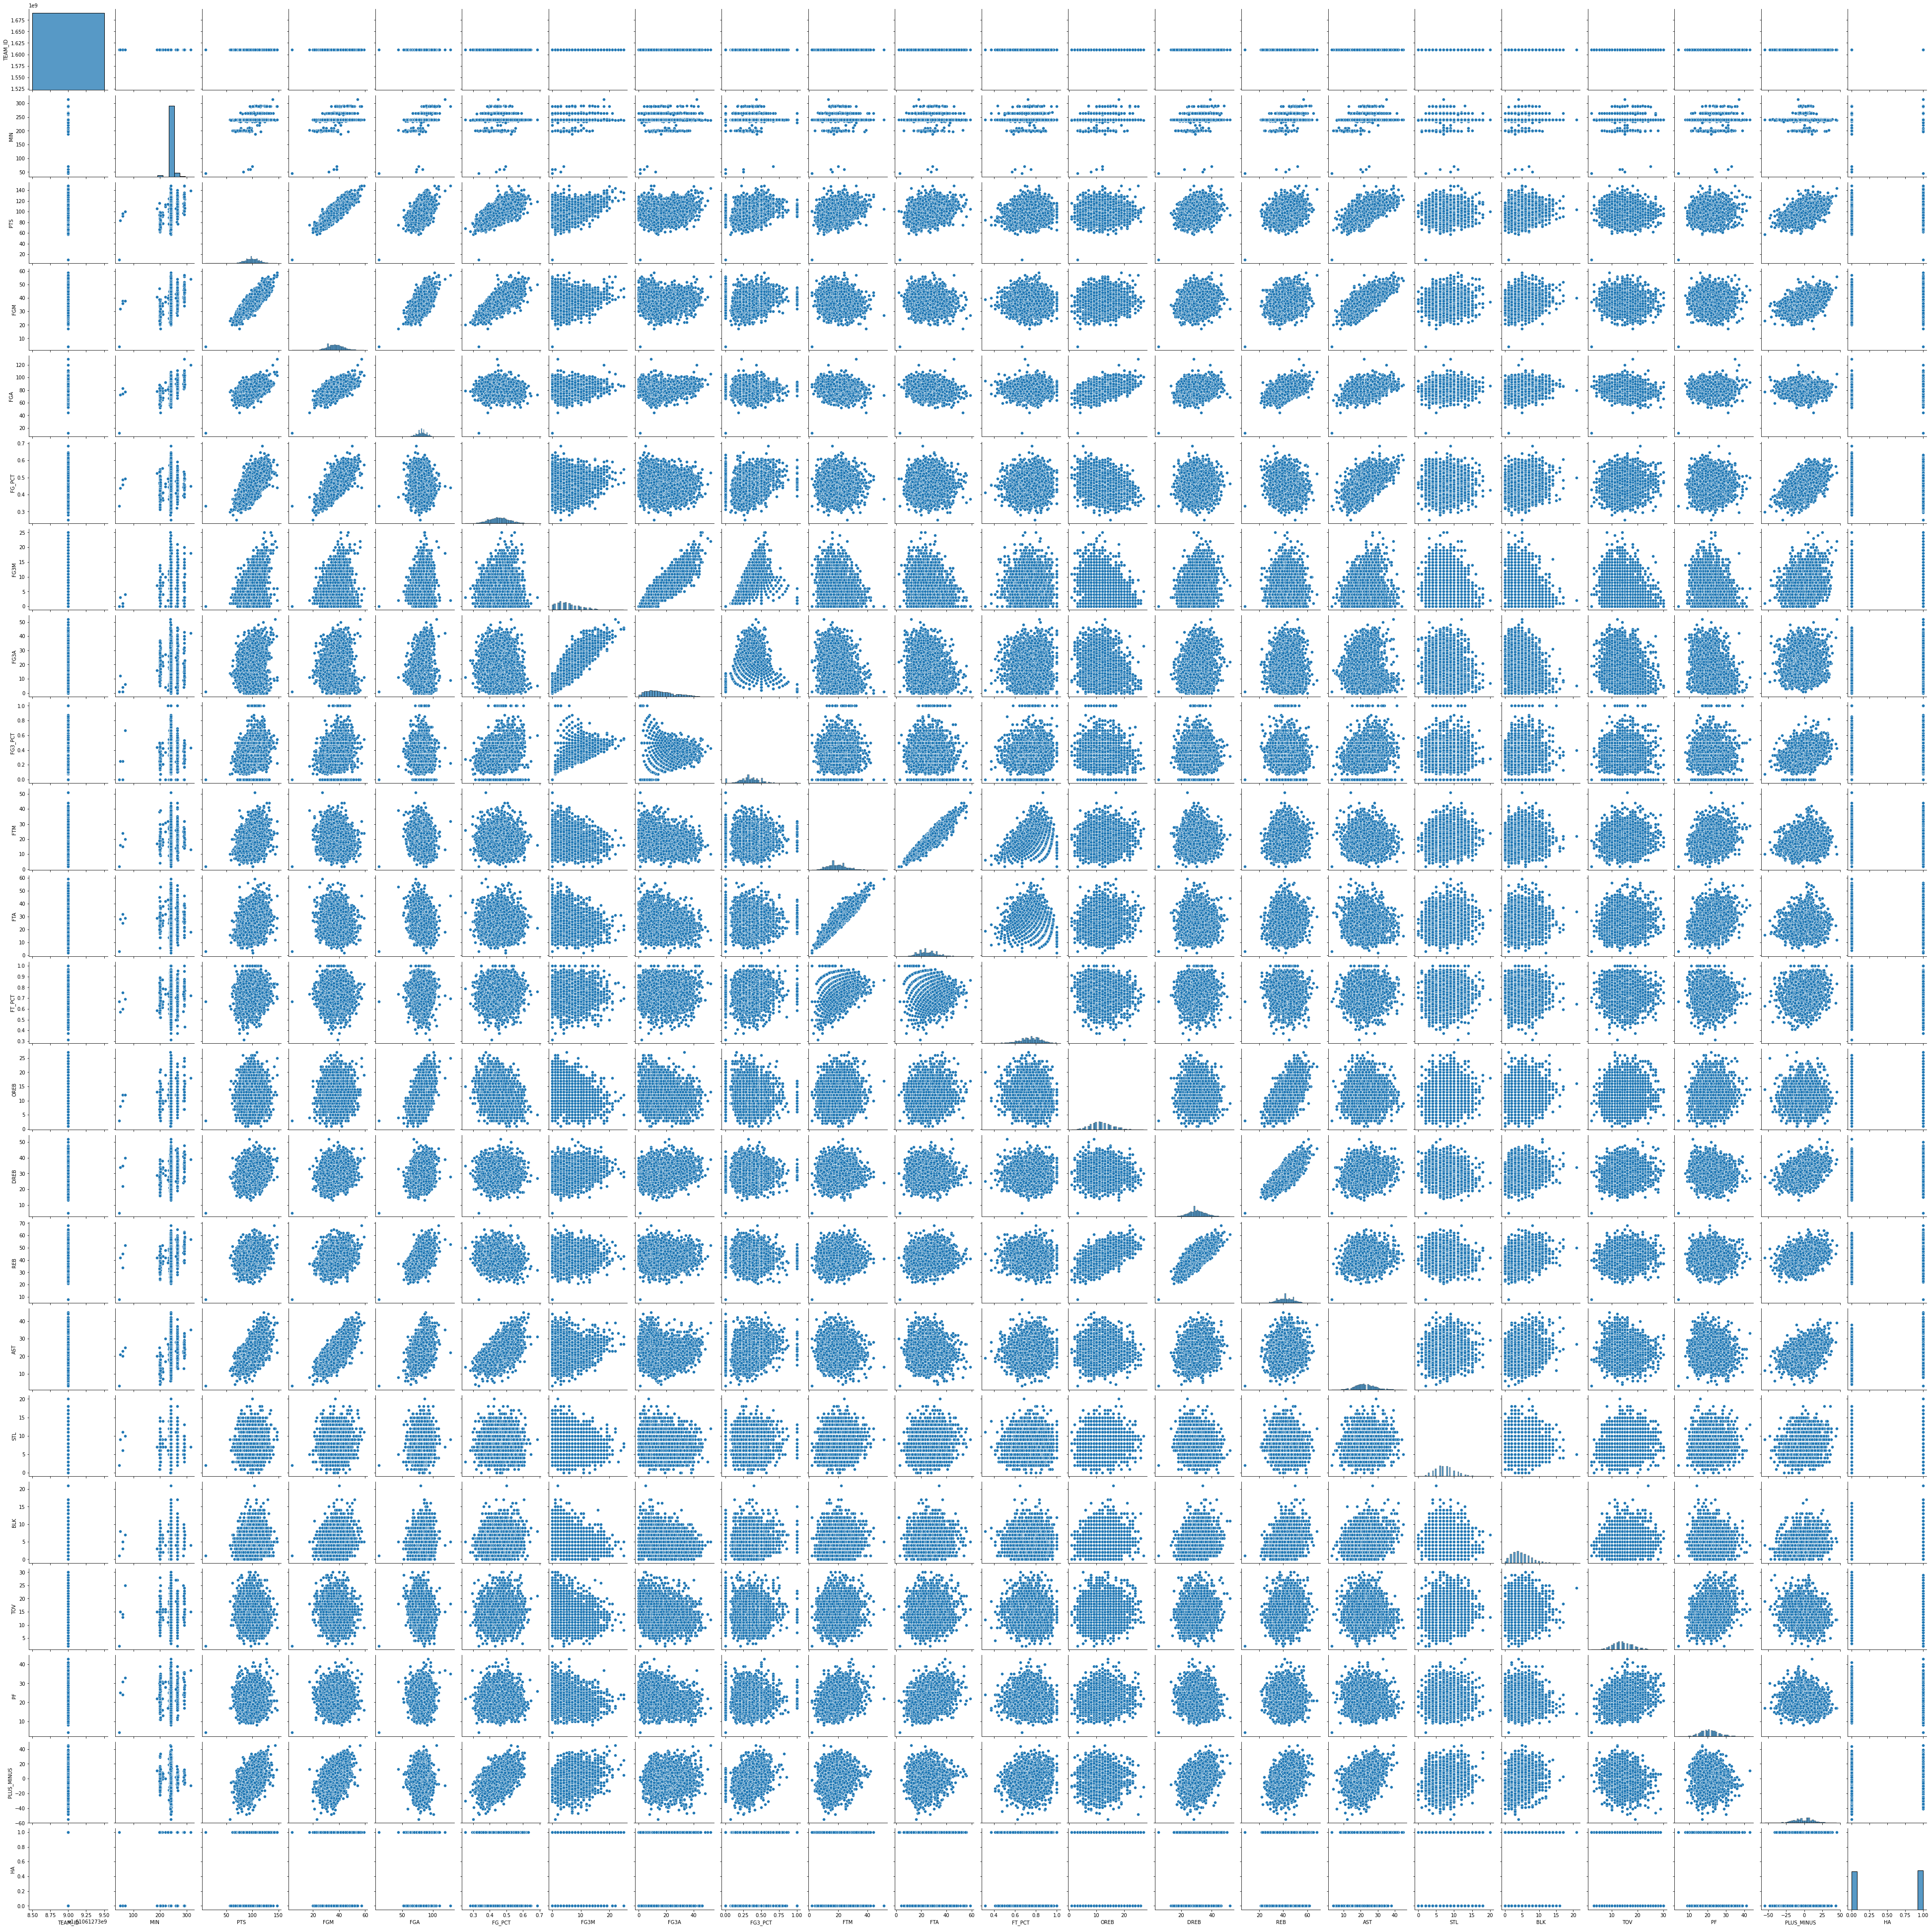

In [74]:
sns.pairplot(cavs_games1)

This graph is comparing every attribute to the other and we can gather a lot of information. Maybe even too much. I want to do something similar but with only a few variables.

<AxesSubplot:xlabel='WL', ylabel='PTS'>

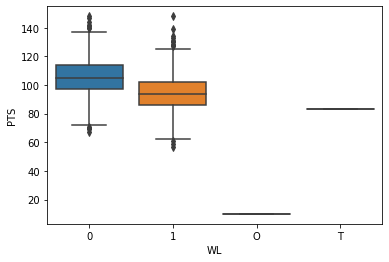

In [80]:
sns.boxplot(x ='WL', y ='PTS', data = cavs_games1)

<AxesSubplot:xlabel='HA', ylabel='PTS'>

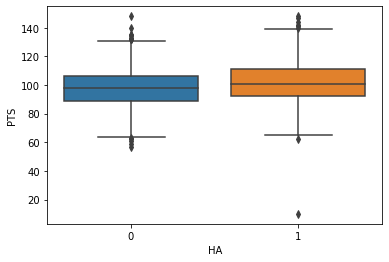

In [81]:
sns.boxplot(x ='HA', y ='PTS', data = cavs_games1)

This is where my conclusion would go as soon as I have one. As you can tell from my data I do not have a conclusion yet. I need to manipulate the data a bit more to show the number of points per game versus home and away so that I can show a difference. I would like to do this with four or five important variables so it is less overwhelming to look at. I still need to think about how I would go about doing this again any suggestions would be great.